1. Импорт необходимых библиотек

In [172]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

2. Загрузка данных

In [173]:
train_load = pd.read_csv('train.csv')
test_load = pd.read_csv('test.csv')

train_load['ApplicationDate'] = pd.to_datetime(train_load['ApplicationDate'], format='%Y-%m-%d')
test_load['ApplicationDate'] = pd.to_datetime(test_load['ApplicationDate'], format='%Y-%m-%d')

train_load['ApplicationYear'] = train_load['ApplicationDate'].dt.year
train_load['ApplicationMonth'] = train_load['ApplicationDate'].dt.month
train_load['ApplicationDay'] = train_load['ApplicationDate'].dt.day

test_load['ApplicationYear'] = test_load['ApplicationDate'].dt.year
test_load['ApplicationMonth'] = test_load['ApplicationDate'].dt.month
test_load['ApplicationDay'] = test_load['ApplicationDate'].dt.day

train_load.drop(columns=['ApplicationDate'], inplace=True)
test_load.drop(columns=['ApplicationDate'], inplace=True)

train_load.head()


print(train_load.isnull().sum())

Age                            530
AnnualIncome                   530
CreditScore                   1031
LoanAmount                    1031
LoanDuration                   530
MaritalStatus                  530
NumberOfDependents             530
HomeOwnershipStatus            530
MonthlyDebtPayments           1031
CreditCardUtilizationRate      530
NumberOfOpenCreditLines        530
NumberOfCreditInquiries        530
DebtToIncomeRatio              530
BankruptcyHistory             1031
LoanPurpose                   1031
PreviousLoanDefaults           530
PaymentHistory                 530
LengthOfCreditHistory          530
SavingsAccountBalance          530
CheckingAccountBalance        1031
TotalAssets                   1031
TotalLiabilities               530
MonthlyIncome                  530
UtilityBillsPaymentHistory     530
JobTenure                      530
EmploymentStatus               530
EducationLevel                 530
Experience                     530
NetWorth            

3. Преобразовываем категориальне переменные

In [174]:
train_load = pd.get_dummies(train_load, columns=['MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose', 'EmploymentStatus', 'EducationLevel'], drop_first=True)
test_load = pd.get_dummies(test_load, columns=['MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose', 'EmploymentStatus', 'EducationLevel'], drop_first=True)

4. Уберу пропуски и повторки, так как их немного, однако можно было заполнить медианным значением

In [175]:
train_load = train_load.dropna()
train_load.drop_duplicates(inplace=True)

3. Предобработка данных

In [176]:
numeric_cols = train_load.select_dtypes(include=[np.number]).columns
train_load[numeric_cols] = train_load[numeric_cols].fillna(train_load[numeric_cols].mean())

numeric_cols_test = test_load.select_dtypes(include=[np.number]).columns
test_load[numeric_cols_test] = test_load[numeric_cols_test].fillna(test_load[numeric_cols_test].mean())
# Отделение целевой переменной и признаков
X = train_load.drop(columns=['RiskScore'])
y = train_load['RiskScore']

4. Разделение данных на обучающую и тестовую выборки

In [177]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

5. Удаление признаков с кореляцией от 0.8. Нет значимой линейной связи между переменными.

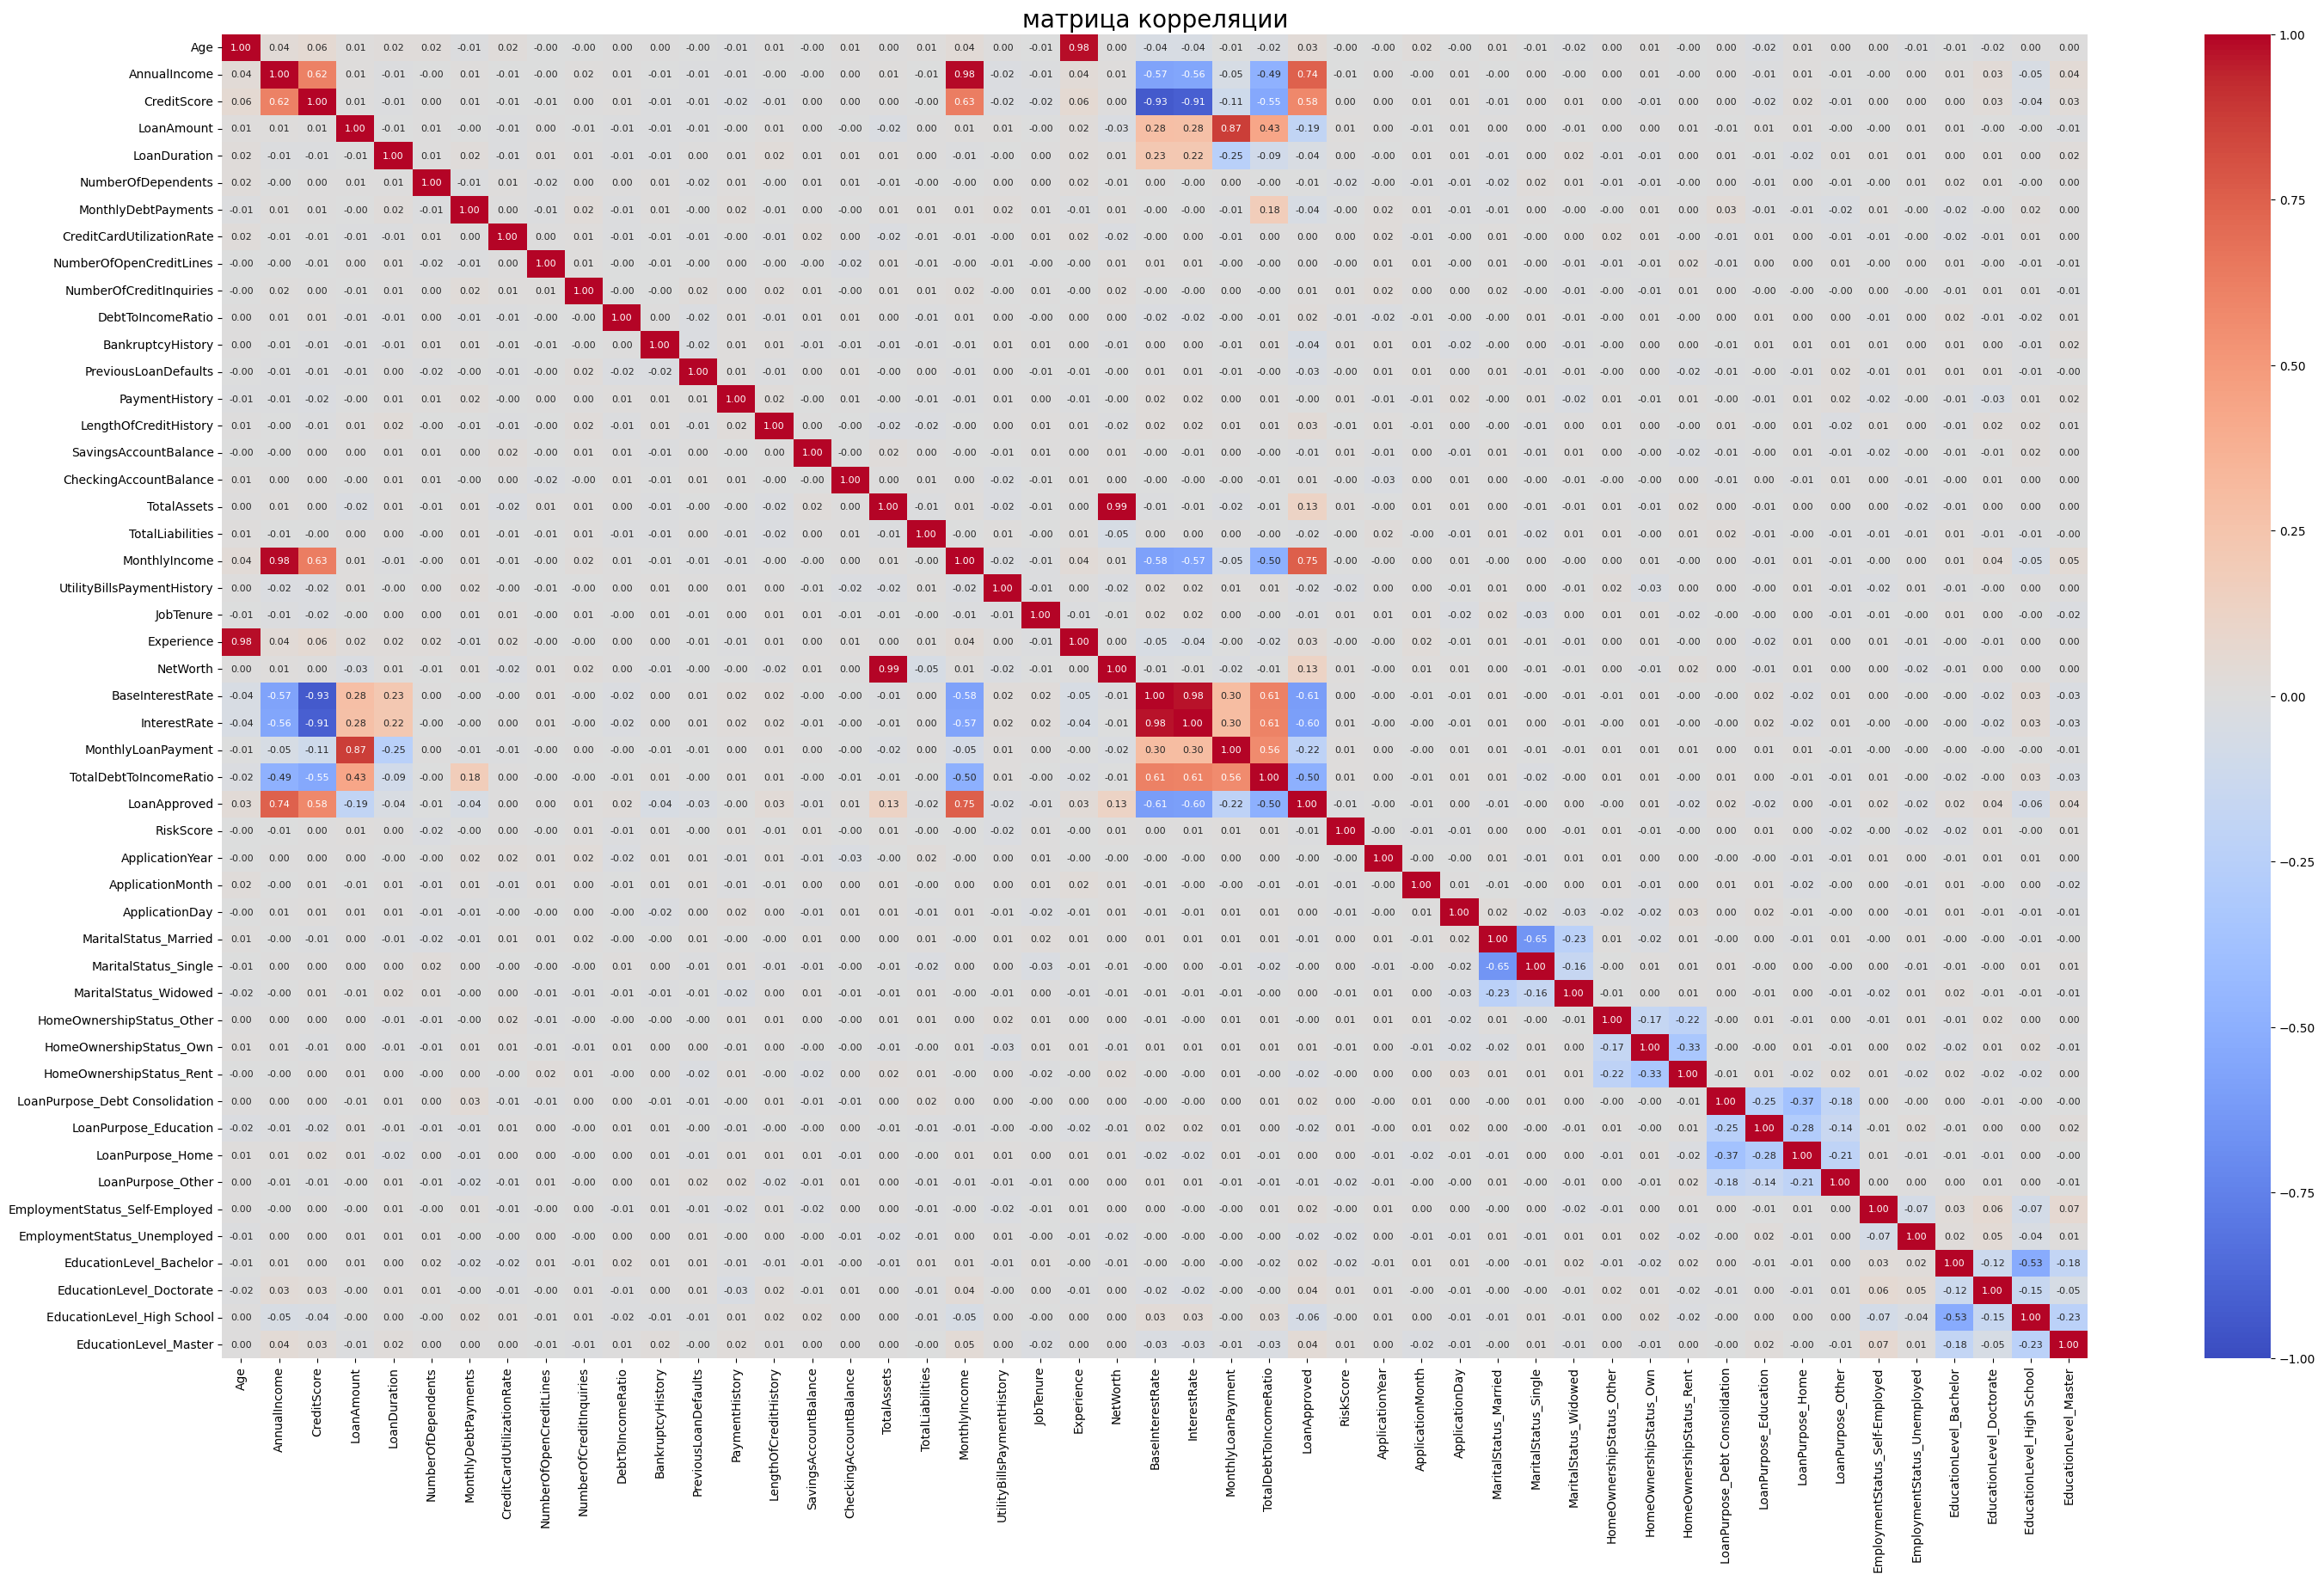

['MonthlyIncome', 'Experience', 'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment', 'LoanApproved']


In [178]:
corr_mtrx = train_load.corr()

plt.figure(figsize=(35, 20))
sns.heatmap(corr_mtrx, annot=True, fmt=".2f", annot_kws={"size": 8}, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("матрица корреляции", fontsize=20)
plt.show()


correlation_threshold = 0.8 #методом проб

corr_mtrx = train_load.corr().abs()

upper_tri = corr_mtrx.where(np.triu(np.ones(corr_mtrx.shape), k=1).astype(bool))

# высококоррелирующие признаки, без 'NetWorth'
to_drop = [
    column for column in upper_tri.columns 
    if any(upper_tri[column] > correlation_threshold) and column != 'NetWorth'
]

# Удаляем высококоррелирующие признаки 
train_load = train_load.drop(columns=to_drop)
test_load = test_load.drop(columns=to_drop)
print(to_drop)


Нормализируем age

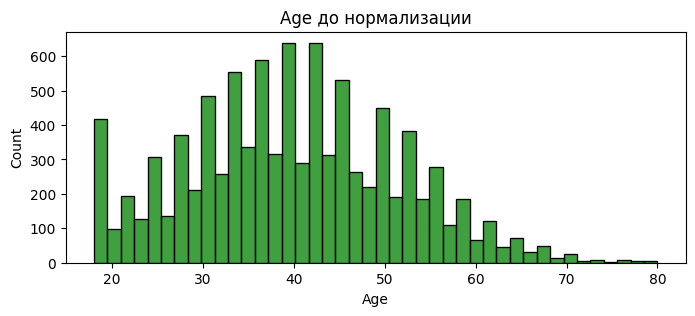

In [179]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
plt.figure(figsize=(8, 3))
sns.histplot(train_load['Age'],  color='green')
plt.title("Age до нормализации")
plt.show()

Распределение нормальное, используем StandardScaler нормализацию

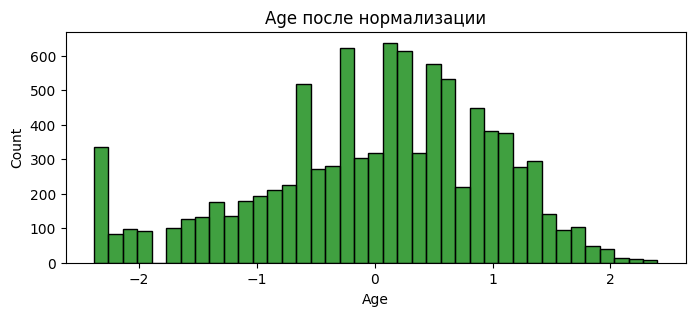

In [180]:
train_load['Age'] = np.log1p(train_load['Age'])
test_load['Age'] = np.log1p(test_load['Age'])
train_load['Age'] = StandardScaler().fit_transform(train_load[['Age']])
test_load['Age'] = StandardScaler().fit_transform(test_load[['Age']])

plt.figure(figsize=(8, 3))
sns.histplot(train_load['Age'],  color='green')
plt.title("Age после нормализации")
plt.show()

ApplicationYear распределение

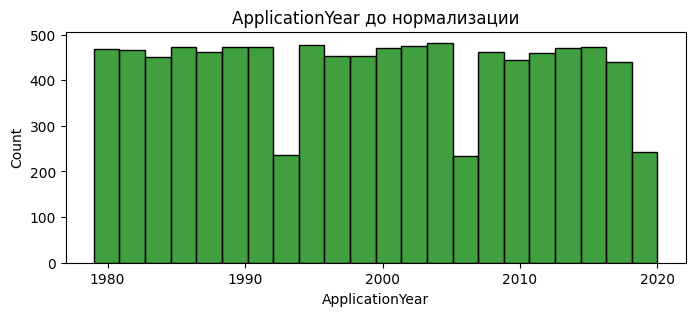

In [181]:
plt.figure(figsize=(8, 3))
sns.histplot(train_load['ApplicationYear'],  color='green')
plt.title("ApplicationYear до нормализации")
plt.show()

равномерное - использую MinMaxScaler (аналогично для месяца и дня)

In [182]:
train_load['ApplicationMonth'] = MinMaxScaler().fit_transform(train_load[['ApplicationMonth']])
test_load['ApplicationMonth'] = MinMaxScaler().fit_transform(test_load[['ApplicationMonth']])
train_load['ApplicationYear'] = MinMaxScaler().fit_transform(train_load[['ApplicationYear']])
test_load['ApplicationYear'] = MinMaxScaler().fit_transform(test_load[['ApplicationYear']])
train_load['ApplicationDay'] = MinMaxScaler().fit_transform(train_load[['ApplicationDay']])
test_load['ApplicationDay'] = MinMaxScaler().fit_transform(test_load[['ApplicationDay']])

AnnualIncome

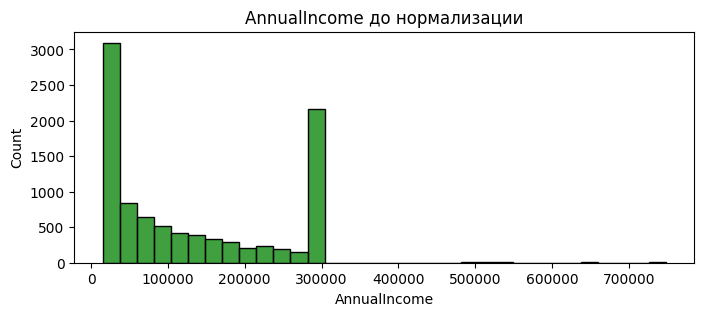

In [183]:
plt.figure(figsize=(8, 3))
sns.histplot(train_load['AnnualIncome'],  color='green')
plt.title("AnnualIncome до нормализации")
plt.show()


равномерное - используем MinMaxScaler

In [184]:
train_load['AnnualIncome'] = MinMaxScaler().fit_transform(train_load[['AnnualIncome']])
test_load['AnnualIncome'] = MinMaxScaler().fit_transform(test_load[['AnnualIncome']])

creditStore:

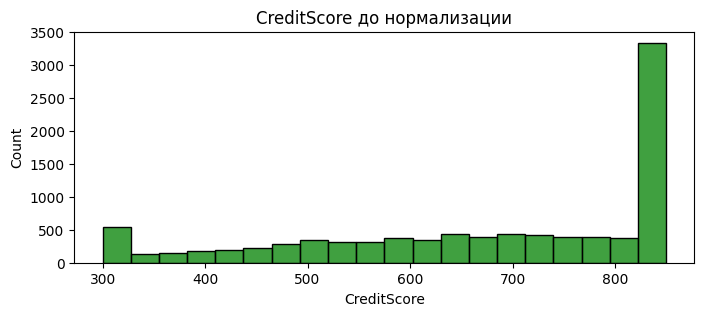

In [185]:
plt.figure(figsize=(8, 3))
sns.histplot(train_load['CreditScore'],  color='green')
plt.title("CreditScore до нормализации")
plt.show()

равномерное - используем MinMaxScaler

In [186]:
train_load['CreditScore'] = MinMaxScaler().fit_transform(train_load[['CreditScore']])
test_load['CreditScore'] = MinMaxScaler().fit_transform(test_load[['CreditScore']])

LoanAmount

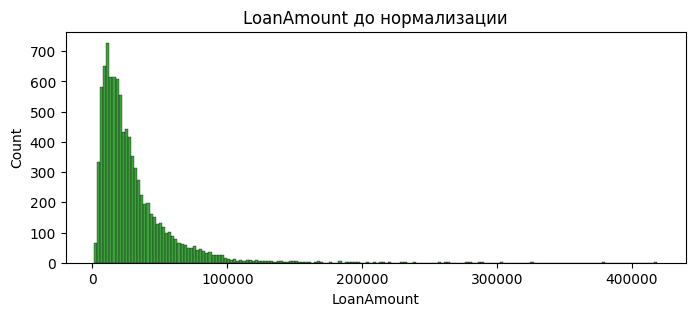

In [187]:
plt.figure(figsize=(8, 3))
sns.histplot(train_load['LoanAmount'],  color='green')
plt.title("LoanAmount до нормализации")
plt.show()

экспонента - прологарифмируем

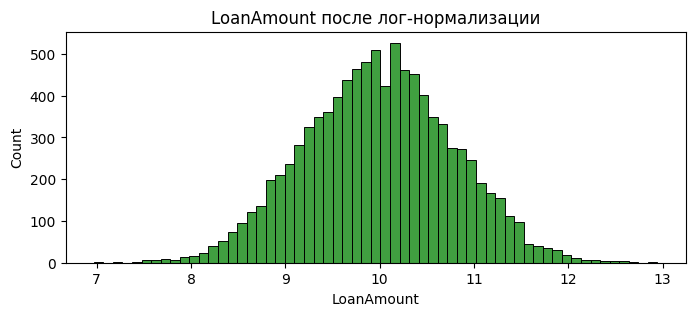

In [188]:
train_load['LoanAmount'] = np.log1p(train_load['LoanAmount'])
test_load['LoanAmount'] = np.log1p(test_load['LoanAmount'])

plt.figure(figsize=(8, 3))
sns.histplot(train_load['LoanAmount'],  color='green')
plt.title("LoanAmount после лог-нормализации")
plt.show()

нормальное - используем StandardScaler

In [189]:
train_load['LoanAmount'] = StandardScaler().fit_transform(train_load[['LoanAmount']])
test_load['LoanAmount'] = StandardScaler().fit_transform(test_load[['LoanAmount']])

LoanDuration

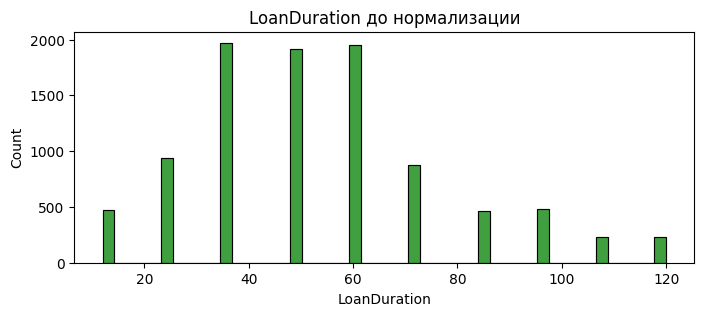

In [190]:
plt.figure(figsize=(8, 3))
sns.histplot(train_load['LoanDuration'], color='green')
plt.title("LoanDuration до нормализации")
plt.show()

нормальное - используем StandardScaler

In [191]:
train_load['LoanDuration'] = StandardScaler().fit_transform(train_load[['LoanDuration']])
test_load['LoanDuration'] = StandardScaler().fit_transform(test_load[['LoanDuration']])

Категориальные не нормируем, NumberOfDependents:

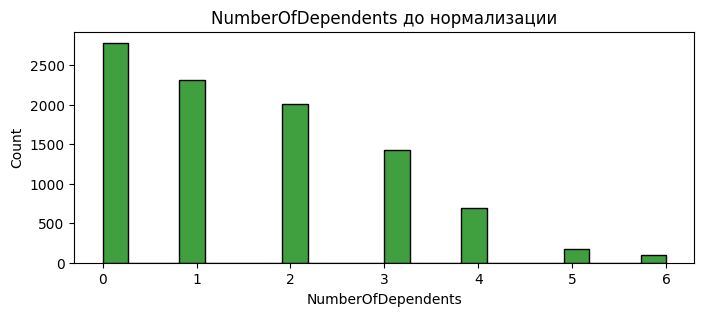

In [192]:
plt.figure(figsize=(8, 3))
sns.histplot(train_load['NumberOfDependents'], color='green')
plt.title("NumberOfDependents до нормализации")
plt.show()

использую minMaxScaler

In [193]:
train_load['NumberOfDependents'] = MinMaxScaler().fit_transform(train_load[['NumberOfDependents']])
test_load['NumberOfDependents'] = MinMaxScaler().fit_transform(test_load[['NumberOfDependents']])

MonthlyDebtPayments:

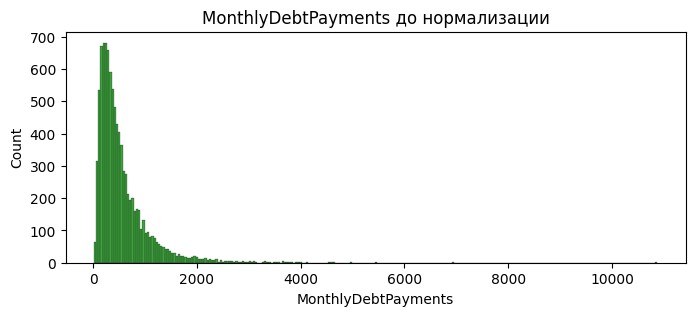

In [194]:
plt.figure(figsize=(8, 3))
sns.histplot(train_load['MonthlyDebtPayments'], color='green')
plt.title("MonthlyDebtPayments до нормализации")
plt.show()


экспонента - логарифмирую и использую StandardScaler нормализацию

In [195]:
train_load['MonthlyDebtPayments'] = np.log1p(train_load['MonthlyDebtPayments'])
test_load['MonthlyDebtPayments'] = np.log1p(test_load['MonthlyDebtPayments'])

train_load['MonthlyDebtPayments'] = StandardScaler().fit_transform(train_load[['MonthlyDebtPayments']])
test_load['MonthlyDebtPayments'] = StandardScaler().fit_transform(test_load[['MonthlyDebtPayments']])

CreditCardUtilizationRate:

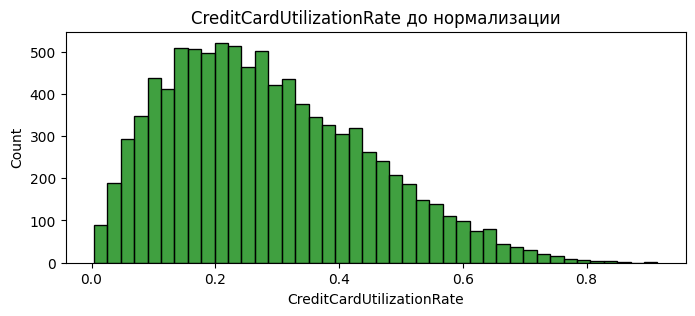

In [196]:
plt.figure(figsize=(8, 3))
sns.histplot(train_load['CreditCardUtilizationRate'], color='green')
plt.title("CreditCardUtilizationRate до нормализации")
plt.show()

нормальное - используем StandardScaler

In [197]:
train_load['CreditCardUtilizationRate'] = StandardScaler().fit_transform(train_load[['CreditCardUtilizationRate']])
test_load['CreditCardUtilizationRate'] = StandardScaler().fit_transform(test_load[['CreditCardUtilizationRate']])

NumberOfOpenCreditLines:

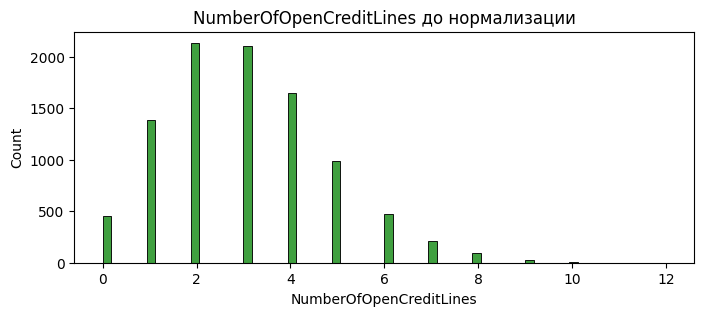

In [198]:
plt.figure(figsize=(8, 3))
sns.histplot(train_load['NumberOfOpenCreditLines'], color='green')
plt.title("NumberOfOpenCreditLines до нормализации")
plt.show()

нормальное - используем StandardScaler

In [199]:
train_load['NumberOfOpenCreditLines'] = StandardScaler().fit_transform(train_load[['NumberOfOpenCreditLines']])
test_load['NumberOfOpenCreditLines'] = StandardScaler().fit_transform(test_load[['NumberOfOpenCreditLines']])

NumberOfCreditInquiries:

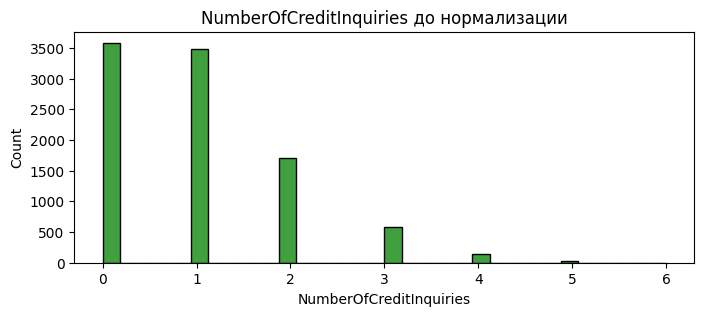

In [200]:
plt.figure(figsize=(8, 3))
sns.histplot(train_load['NumberOfCreditInquiries'], color='green')
plt.title("NumberOfCreditInquiries до нормализации")
plt.show()

используем StandardScaler

In [201]:
train_load['NumberOfCreditInquiries'] = StandardScaler().fit_transform(train_load[['NumberOfCreditInquiries']])
test_load['NumberOfCreditInquiries'] = StandardScaler().fit_transform(test_load[['NumberOfCreditInquiries']])

DebtToIncomeRatio:

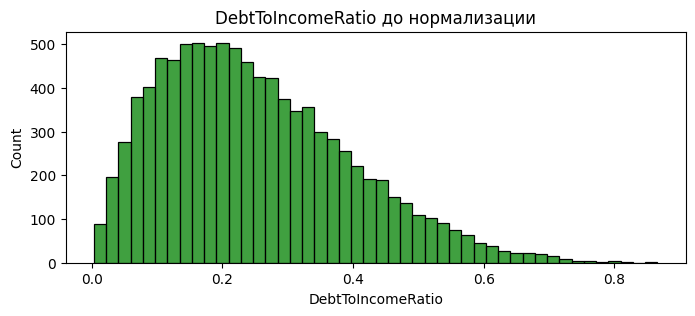

In [202]:
plt.figure(figsize=(8, 3))
sns.histplot(train_load['DebtToIncomeRatio'], color='green')
plt.title("DebtToIncomeRatio до нормализации")
plt.show()

нормальное - используем StandardScaler

In [203]:
train_load['DebtToIncomeRatio'] = StandardScaler().fit_transform(train_load[['DebtToIncomeRatio']])
test_load['DebtToIncomeRatio'] = StandardScaler().fit_transform(test_load[['DebtToIncomeRatio']])

PaymentHistory:

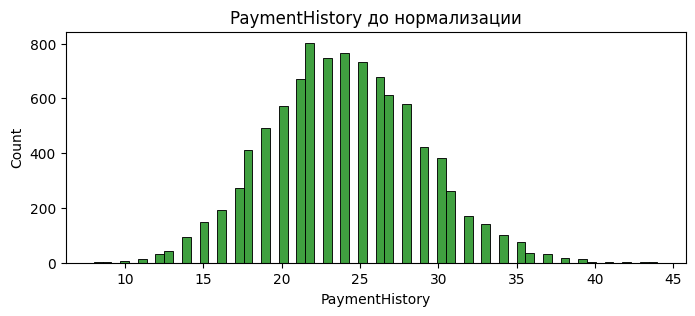

In [204]:
plt.figure(figsize=(8, 3))
sns.histplot(train_load['PaymentHistory'], color='green')
plt.title("PaymentHistory до нормализации")
plt.show()

нормальное - используем StandardScaler

In [205]:
train_load['PaymentHistory'] = StandardScaler().fit_transform(train_load[['PaymentHistory']])
test_load['PaymentHistory'] = StandardScaler().fit_transform(test_load[['PaymentHistory']])

LengthOfCreditHistory:

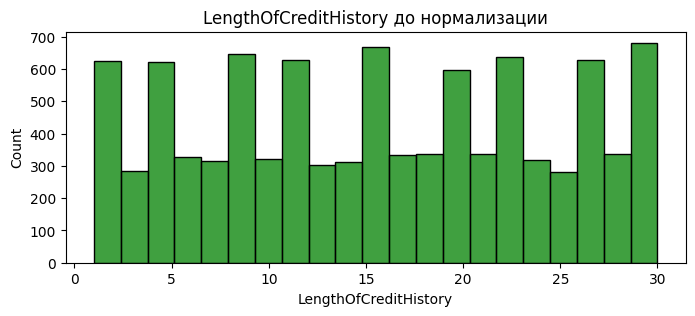

In [206]:
plt.figure(figsize=(8, 3))
sns.histplot(train_load['LengthOfCreditHistory'], color='green')
plt.title("LengthOfCreditHistory до нормализации")
plt.show()

равномерное - используем MinMaxScaler

In [207]:
train_load['LengthOfCreditHistory'] = MinMaxScaler().fit_transform(train_load[['LengthOfCreditHistory']])
test_load['LengthOfCreditHistory'] = MinMaxScaler().fit_transform(test_load[['LengthOfCreditHistory']])

SavingsAccountBalance:

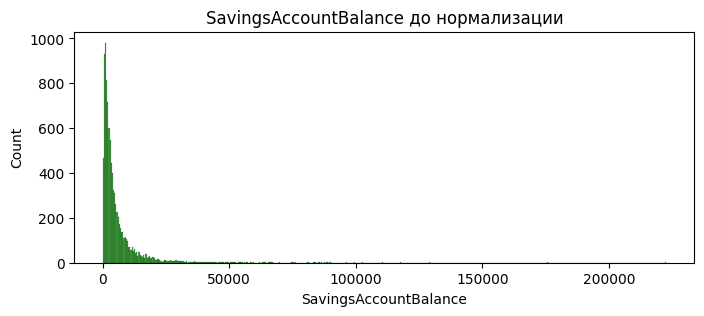

In [208]:
plt.figure(figsize=(8, 3))
sns.histplot(train_load['SavingsAccountBalance'], color='green')
plt.title("SavingsAccountBalance до нормализации")
plt.show()


экспоненциальное - логарифмирую и использую StandardScaler

In [209]:
train_load['SavingsAccountBalance'] = np.log1p(train_load['SavingsAccountBalance'])
test_load['SavingsAccountBalance'] = np.log1p(test_load['SavingsAccountBalance'])
train_load['SavingsAccountBalance'] = StandardScaler().fit_transform(train_load[['SavingsAccountBalance']])
test_load['SavingsAccountBalance'] = StandardScaler().fit_transform(test_load[['SavingsAccountBalance']])

CheckingAccountBalance:

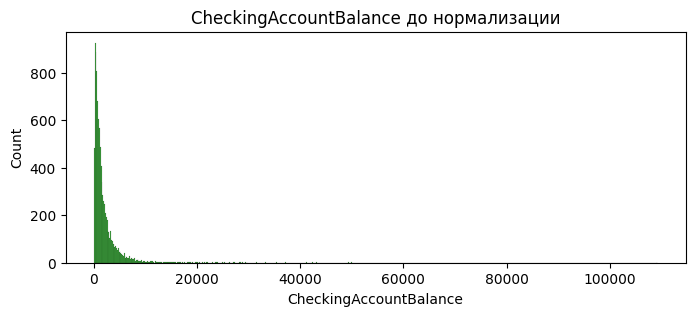

In [210]:
plt.figure(figsize=(8, 3))
sns.histplot(train_load['CheckingAccountBalance'], color='green')
plt.title("CheckingAccountBalance до нормализации")
plt.show()

экспоненциальное - логарифмирую и использую StandardScaler

In [211]:
train_load['CheckingAccountBalance'] = np.log1p(train_load['CheckingAccountBalance'])
test_load['CheckingAccountBalance'] = np.log1p(test_load['CheckingAccountBalance'])
train_load['CheckingAccountBalance'] = StandardScaler().fit_transform(train_load[['CheckingAccountBalance']])
test_load['CheckingAccountBalance'] = StandardScaler().fit_transform(test_load[['CheckingAccountBalance']])

TotalAssets:

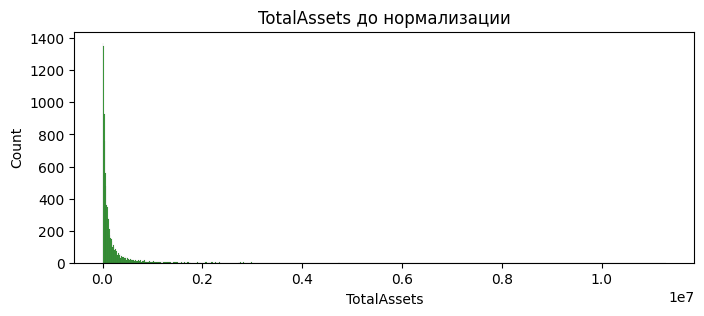

In [212]:
plt.figure(figsize=(8, 3))
sns.histplot(train_load['TotalAssets'], color='green')
plt.title("TotalAssets до нормализации")
plt.show()

экспоненциальное - логарифмирую и использую StandardScaler

In [213]:
train_load['TotalAssets'] = np.log1p(train_load['TotalAssets'])
test_load['TotalAssets'] = np.log1p(test_load['TotalAssets'])
train_load['TotalAssets'] = StandardScaler().fit_transform(train_load[['TotalAssets']])
test_load['TotalAssets'] = StandardScaler().fit_transform(test_load[['TotalAssets']])

TotalLiabilities:

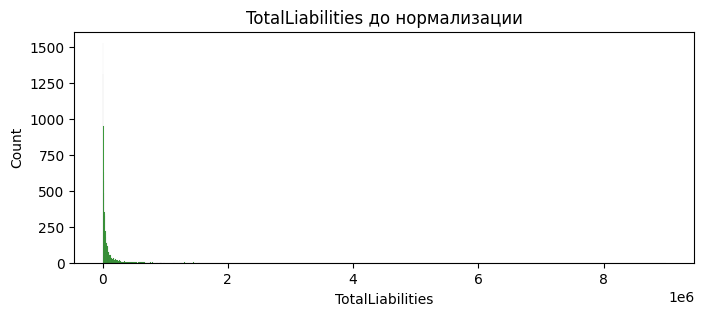

In [214]:
plt.figure(figsize=(8, 3))
sns.histplot(train_load['TotalLiabilities'], color='green')
plt.title("TotalLiabilities до нормализации")
plt.show()

экспоненциальное - логарифмирую и использую StandardScaler

In [215]:
train_load['TotalLiabilities'] = np.log1p(train_load['TotalLiabilities'])
test_load['TotalLiabilities'] = np.log1p(test_load['TotalLiabilities'])
train_load['TotalLiabilities'] = StandardScaler().fit_transform(train_load[['TotalLiabilities']])
test_load['TotalLiabilities'] = StandardScaler().fit_transform(test_load[['TotalLiabilities']])

JobTenure

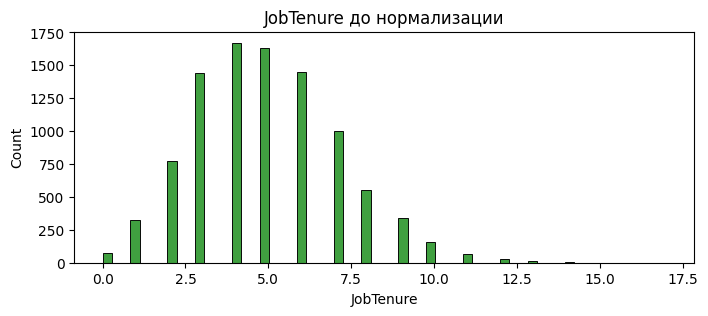

In [216]:
plt.figure(figsize=(8, 3))
sns.histplot(train_load['JobTenure'], color='green')
plt.title("JobTenure до нормализации")
plt.show()

нормальное - использую StandardScaler

In [217]:
train_load['JobTenure'] = StandardScaler().fit_transform(train_load[['JobTenure']])
test_load['JobTenure'] = StandardScaler().fit_transform(test_load[['JobTenure']])

TotalDebtToIncomeRatio:

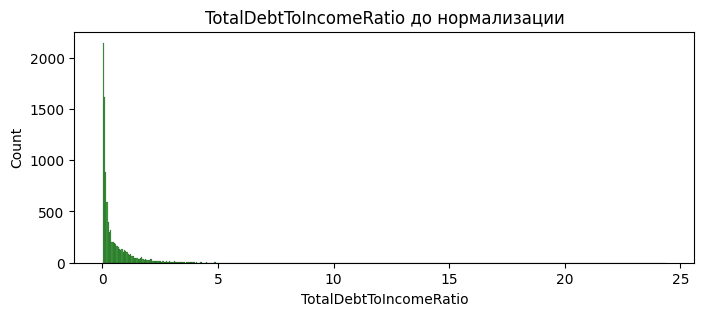

In [218]:
plt.figure(figsize=(8, 3))
sns.histplot(train_load['TotalDebtToIncomeRatio'], color='green')
plt.title("TotalDebtToIncomeRatio до нормализации")
plt.show()

экспоненциальное - логарифмирую и использую StandardScaler

In [219]:
train_load['TotalDebtToIncomeRatio'] = np.log1p(train_load['TotalDebtToIncomeRatio'])
test_load['TotalDebtToIncomeRatio'] = np.log1p(test_load['TotalDebtToIncomeRatio'])
train_load['TotalDebtToIncomeRatio'] = StandardScaler().fit_transform(train_load[['TotalDebtToIncomeRatio']])
test_load['TotalDebtToIncomeRatio'] = StandardScaler().fit_transform(test_load[['TotalDebtToIncomeRatio']])

RiskScore:

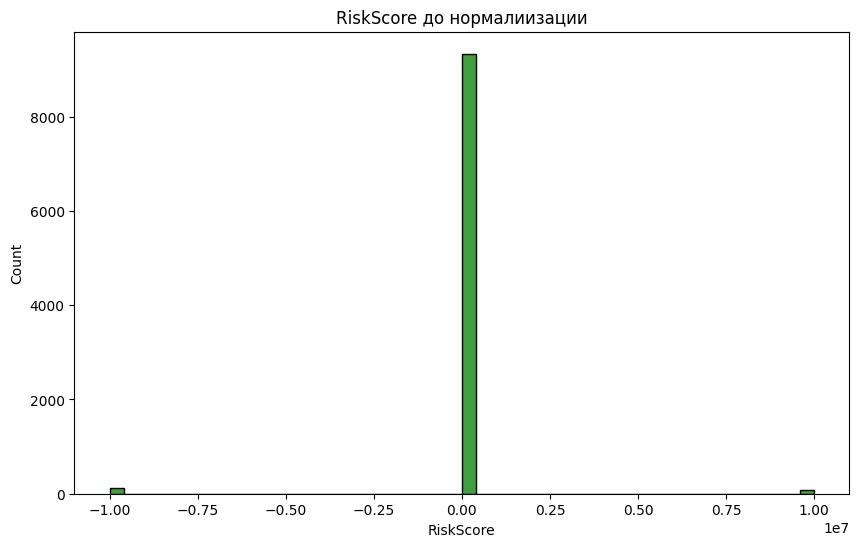

In [220]:
plt.figure(figsize=(10, 6))
sns.histplot(train_load['RiskScore'], color='green', bins=50)
plt.title("RiskScore до нормалиизации")
plt.show()

Interquartile Range

In [221]:
QuartileMeaning1 = train_load['RiskScore'].quantile(0.25)
QuartileMeaning3 = train_load['RiskScore'].quantile(0.75)
InterquartileRange = QuartileMeaning3 - QuartileMeaning1 

lower = QuartileMeaning1 - 1.5 * InterquartileRange
upper = QuartileMeaning3 + 1.5 * InterquartileRange

train_load = train_load[(train_load['RiskScore'] >= lower) & (train_load['RiskScore'] <= upper)]

5. Обучение модели и оценка

In [222]:
# Разделение на признаки и целевую переменную 
X = train_load.drop(columns=['RiskScore']) 
Y = train_load['RiskScore'] 

# Разделение данных на тренировочные и тестовые (0.8 к 0.2)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train_scaled = X_train
X_test_scaled = X_test

model =  LinearRegression()
model.fit(X_train_scaled, Y_train)

Y_pred = model.predict(X_test_scaled)

# Оценка mse и r2
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"mse: {mse}")
print(f"r^2: {r2}")


mse: 46.67217419014122
r^2: 0.8441380269027481


6. Предсказание

In [223]:
X_test_final = test_load.drop(columns=['ID'])
# Предсказание для test
y_pred_final = model.predict(X_test_final)
submission = pd.DataFrame({ 'ID': test_load['ID'], 'RiskScore': y_pred_final })
submission.to_csv('submission.csv', index=False)